<a href="https://colab.research.google.com/github/KGzB/CAS-Applied-Data-Science/blob/master/Module-2/CAS-D1-DescriptiveStatistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook 1, Module 2, Statistical Inference for Data Science, CAS Applied Data Science, 2024-08-27, A. Mühlemann, University of Bern.

*This notebook is based on the notebook by S. Haug and G. Conti from 2020*


# 1. Descriptive Statistics on Single Features



**Goals**
- Graphical preparation of the data
- Calculate summary statistics


First load the necessary libraries / modules.

In [27]:
# Load the needed python libraries by executing this python code (press ctrl enter)
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import pandas as pd
import io
from scipy.stats import kurtosis


In this notebook we will look at a dataset about the effect of surface and vision on balance (source https://gksmyth.github.io/ozdasl/oz/ctsib.html).

The balance of subjects were observed on two different surfaces and for restricted and unrestricted vision.

- *Subject*: id of subject-
- *Sex*: male or female
- *Age*: age in years
- *Height*: height in cm
- *Weight*:	weight in kg
-	*Surface*: normal or foam
- *Vision*:	eyes open, eyes closed, or closed dome
-	*CTSIB*: Qualitive measure of balance, 1 (stable) - 4 (unstable)

I uploaded the dataset to Github so that we can read it directly from there.

In [3]:
url = "https://github.com/KGzB/CAS-Applied-Data-Science/blob/master/Module-2/balance.csv?raw=true"
df = pd.read_csv(url, sep=";")
df.head() # Print the first five rows
df


,Subject,Sex,Age,Height,Weight,Surface,Vision,CTSIB
0,1,male,22,176.0,68.2,norm,open,1
1,1,male,22,176.0,68.2,norm,open,1
2,1,male,22,176.0,68.2,norm,closed,2
3,1,male,22,176.0,68.2,norm,closed,2
4,1,male,22,176.0,68.2,norm,dome,1
...,...,...,...,...,...,...,...,...
475,40,female,22,164.0,65.0,foam,open,2
476,40,female,22,164.0,65.0,foam,closed,2
477,40,female,22,164.0,65.0,foam,closed,2
478,40,female,22,164.0,65.0,foam,dome,2


## 1.1 Graphical Analysis
### 1.1.1 Pie chart and bar plot (categorical variables)
Pie charts are used to show proportions of a whole.

We could, for example, ask ourselves about how the genders were represented in this study percentage-wise. When we look at the dataset more closely we can see that each participant participated in different experiments. Thus, it probably would make sense to first get a subdataframe with just the distinct individuals.

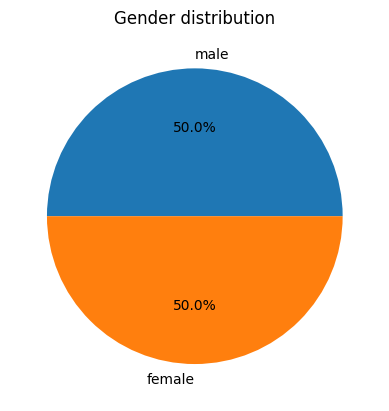

In [4]:
# Pie chart of the gender distribution
df
participants = df[["Subject", "Sex"]].drop_duplicates()
participants

# count the genders
gender_counts = participants["Sex"].value_counts()
gender_counts

plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%")
plt.title("Gender distribution")
plt.show()

The problem with pie charts is that if there are many groups we tend missinterpret the pie slices (https://www.data-to-viz.com/caveat/pie.html). Thus, it often is reasonable sense to use a barplot instead.

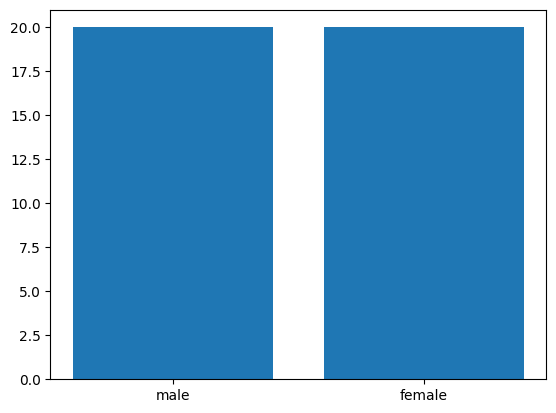

In [5]:
# Barplot of the gender distribution
df
participants = df[["Subject", "Sex"]].drop_duplicates()
participants

gender_counts = participants["Sex"].value_counts()
gender_counts

plt.bar(gender_counts.index, gender_counts.values)
plt.show()

## 1.1.2 Histogram (numerical variables)
Histograms are used to display frequencies or proportions.

To get a better idea about our participants we would like to look at their age distribution using a histogram.

Text(0.5, 1.0, 'Age distribution')

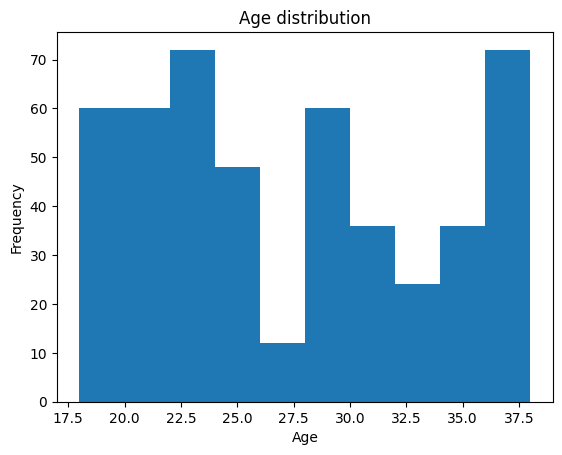

In [6]:
# histogram of age distibtion
ages = df["Age"]
ages
plt.hist(ages, bins=10)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age distribution")

The authors mention
"for both males and females, ten older (more than 24 years old) and ten younger subjects were selected".
This can be seen in this histogramm (at least that when not considering the genders yet)

Let us now check whether this is fulfilled for each gender.

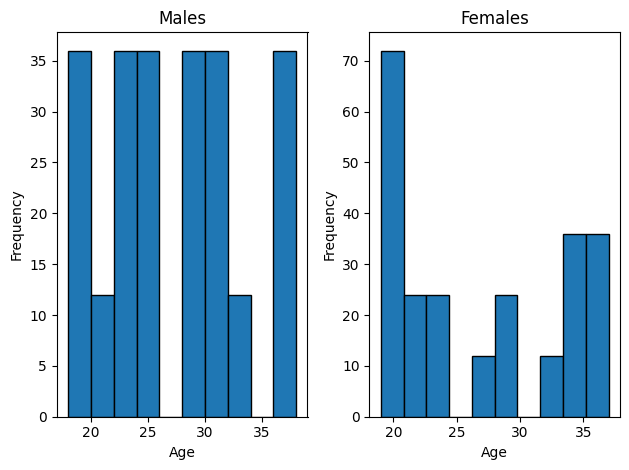

In [7]:
# Create a histogram for each gender
df
participants = df[["Sex", "Age"]]
males   = participants[participants["Sex"] == "male"]
females = participants[participants["Sex"] == "female"]

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.hist(males["Age"], bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Males')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.hist(females["Age"], bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Females')

plt.tight_layout()  # Adjust spacing between plots
plt.show()

### 1.1.3 Scatter plot colored by gender (simulatneous description)

Scatter plots use dots to represent values for two different numeric variables.

For example, we could look at the species and one of the numerical characteristics simulatneously.

It is reasonable to assume that taller people tend to be heavier. We would like to check whether this assumption is fulfilled in our dataset. To differentiate between the genders we can color the dots with respect to the genders.

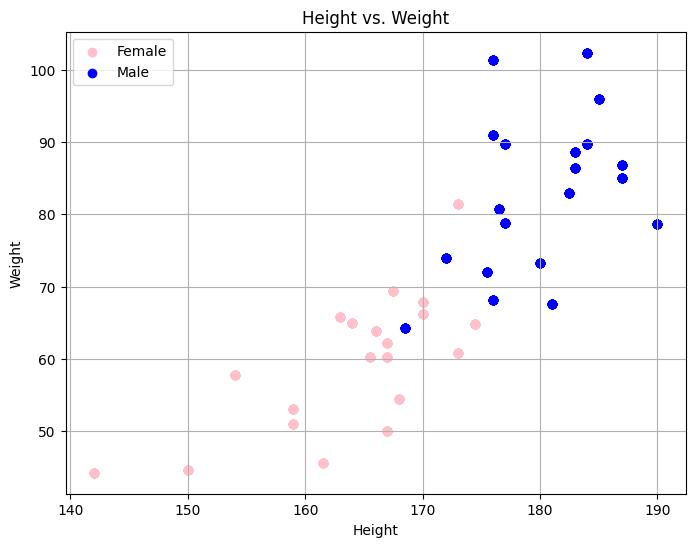

In [8]:
# Scatter plot of Height and Weight colored with respect to gender
df
heights = df["Height"]
weights = df["Weight"]
genders = df["Sex"]

plt.figure(figsize=(8, 6))
plt.scatter(heights[genders == "female"], weights[genders == "female"], label='Female', marker='o', color='pink')
plt.scatter(heights[genders == "male"], weights[genders == "male"], label='Male', marker='o', color='blue')

plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs. Weight')
plt.legend()
plt.grid(True)
plt.show()



What can you see in this picture?

# 1.2 Numerical analysis

# 1.2.1 Location

Location measures are used to describe typical values of a variable. Best known are the mean and the median.


In [9]:
# Mean of numerical variables of participants
df

data = df[["Age", "Height", "Weight"]]
data.mean()

,0
Age,26.800
Height,172.050
Weight,71.145


Maybe it would make sense to group by gender.

In [10]:
# Mean of numerical variables of participants grouped by gender
data = df[["Sex", "Age", "Height", "Weight"]].groupby("Sex")
data.mean()

,Age,Height,Weight
Sex,,,
female,26.9,164.05,59.41
male,26.7,180.05,82.88


In [11]:
# Median of numerical variables on participants grouped by Sex
data = df[["Sex", "Age", "Height", "Weight"]].groupby("Sex")
data.median()

,Age,Height,Weight
Sex,,,
female,25.5,166.5,60.5
male,26.0,180.5,84.0


What do you notice when you compare the mean with the median?

## 1.2.2 Spread

Typical values are interesting but sometimes more information is needed. It is for example also of interest to see how spead the values are. Typical measures for the spread are the variance, standard deviation, inter quartile range, etc.


In [16]:
# Standard deviation of numerical variables on participants grouped by Sex
data = df[["Sex", "Age", "Height", "Weight"]].groupby("Sex")
data.std()

,Age,Height,Weight
Sex,,,
female,6.585644,7.899844,9.240654
male,6.129154,5.372875,10.631111


Which variable has the most standard deviation? would you have expected that?

We can also look at the IQR.

In [20]:
# IQR of Weight
data = df[["Sex", "Age", "Height", "Weight"]].groupby("Sex")
data
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Sex
female    14.0
male       9.0
Name: Age, dtype: float64


Compare the standard deviation of *Weight* with its IQR.


Alternatively, one can also get most of those measures with a single command:

In [21]:
participants = df[['Subject', 'Sex', 'Age', 'Height',	'Weight']].drop_duplicates()
grouped_participants = participants.groupby('Sex')
grouped_participants[['Age', 'Height',	'Weight']].describe()

Age                                               Height          \
       count  mean       std   min   25%   50%   75%   max  count    mean   
Sex                                                                         
female  20.0  26.9  6.742637  19.0  20.0  25.5  34.0  37.0   20.0  164.05   
male    20.0  26.7  6.275265  18.0  22.0  26.0  31.0  38.0   20.0  180.05   

        ...               Weight                                            \
        ...    75%    max  count   mean        std   min   25%   50%   75%   
Sex     ...                                                                  
female  ...  168.5  174.5   20.0  59.41   9.460939  44.2  52.5  60.5  65.2   
male    ...  184.0  190.0   20.0  82.88  10.884542  64.2  73.8  84.0  89.8   

               
          max  
Sex            
female   81.4  
male    102.4  

[2 rows x 24 columns]

However, this output is not very comprehensible. Here it makes more sense to consider only one species for the summary:

In [22]:
grouped_participants['Weight'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,20.0,59.41,9.460939,44.2,52.5,60.5,65.2,81.4
male,20.0,82.88,10.884542,64.2,73.8,84.0,89.8,102.4


Do all these digits after the comma make sense?

## 1.2.3 Shape

Another measure that is often looked at is the shape of the distribution. The mostly used measures are the skewness and the kurtosis.

In [26]:
# Skew of numerical variables on participants grouped by Sex
data = df[["Sex", "Age", "Height", "Weight"]].groupby("Sex")

data.skew()

,Age,Height,Weight
Sex,,,
female,0.248731,-1.191112,0.129234
male,0.218119,-0.159789,0.052551


The skewness of *Height* is $<0$ for both genders. What does that mean?

Now let us look at the kurtosis.

In [31]:
# Kurtosis of numerical variables on participants grouped by Sex

data[['Age', 'Height',	'Weight']].apply(pd.DataFrame.kurt, numeric_only=True)

,Age,Height,Weight
Sex,,,
female,-1.581186,1.123474,-0.157329
male,-1.083731,-0.609606,-0.800119


The idea behind the kurtosis is the following:
Some numerical characteristics, when the sample size is large and the intervals are small, result in a histogram that resembles a Gaussian bell curve. In this case, the value of the kurtosis is close to zero. If the tails are heavier than you would expect for a Gaussian distribution the kurtosis will be substantially positive. If the tails are less heavy than you would expect for a Gaussian distribution the kurtosis will be negative.


## 1.7 Outlook
A often used example of a normal distribtion is the height distribtion in a population. Let us check, whether this could also be the case for our data set.

When looking at hypothesis testing, we will see how to test this mathematically.

Our model is a normal distribution with the mean and width taken from the dataset: **norm.pdf(x,mean,width)**.

172.05 10.594991559876116


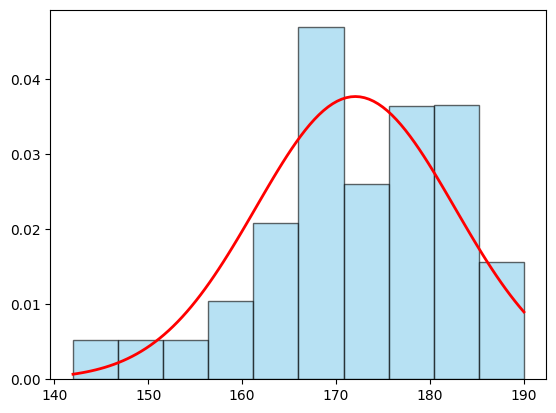

In [32]:
from scipy.stats import norm

# Get mean and std from height

mean  = participants['Height'].mean()
std = participants['Height'].std()
print(mean,std)

# Create gaussian pdf
xmin = participants['Height'].min()
xmax = participants['Height'].max()
x = np.linspace(xmin, xmax, 100)
pdf = norm.pdf(x, mean, std)

# Plot histogram
plt.hist(participants['Height'], density=True, alpha=0.6, color='skyblue', edgecolor='black', label=' Histogram')
plt.plot(x, pdf, 'r', linewidth=2, label='Normal Distribution')
plt.show()

What do you think?

# 2. Simultaneous Description of two Features

In the first part of this notebook, we only looked at individual characteristics. For example, we calculated the mean *slength* of *iris setosa*. Of course, we did this simultaneously for all characteristics and species, but we never compared two characteristics directly. That is what we would like to do now.

## 2.1 Graphical Analysis

### 2.1.1 Boxplots

A boxplot is a graphical display of the minimum, maximum, and the 3 quartiles.

We could for example look at the difference in balance scores depending on the surface the participants stand on. Let us first consider the case when the particiants view is not obstructed.

<Axes: >

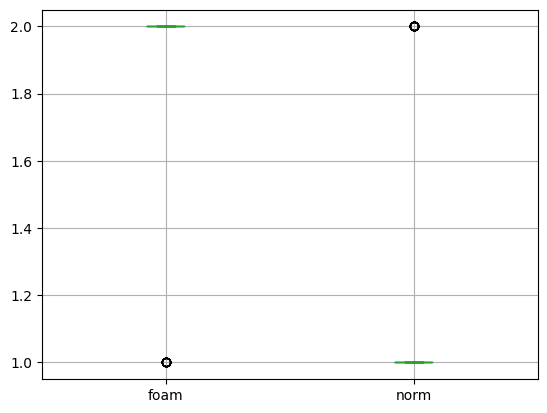

In [42]:
# Boxplots of CTSIB-score for the two different surfaces.
tmp = df[df['Vision']=='open'][['Surface', 'CTSIB']]
tmp.pivot(columns='Surface', values='CTSIB').boxplot()

Would you expect the boxplots to look like this? Inspect the dataset more closely.

We could also look at the height distribution according to the genders.

<Axes: >

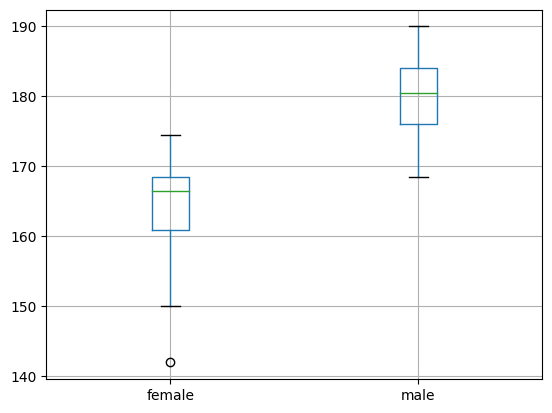

In [43]:
# Boxplots of height the genders.
tmp = participants[['Sex', 'Height']]
tmp.pivot(columns='Sex', values='Height').boxplot()

### 2.1.2 Scatter matrix

Now let us see whether some of the numerical infos on the participants correlate.  (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.plotting.scatter_matrix.html)

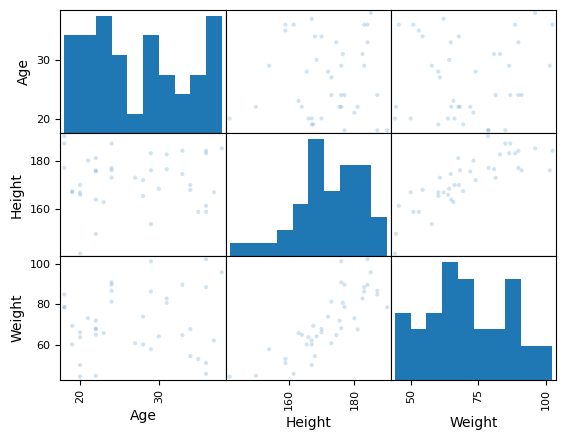

In [44]:
from pandas.plotting import scatter_matrix
scatter_matrix(participants[['Age','Height','Weight']], alpha=0.2, diagonal='hist')
plt.show()

As we would have assumed there is a positive correlation between height and weight.

## 2.2 Numerical Analyis

### 2.3 Correlation
To get more information on the correlation between two variables the correlation coefficient is calculated.

Let's see whether the correlation coefficient does support this observation.

**Caution**: correlation not equals causation!!


In [45]:
# Correlation (Pearson) of Age, Height and Weight
correlation_matrix = df[['Age', 'Height', 'Weight']].corr()
print(correlation_matrix)

             Age    Height    Weight
Age     1.000000  0.031014  0.100257
Height  0.031014  1.000000  0.815839
Weight  0.100257  0.815839  1.000000


What is the definition of the correlation?


What kind of relationship between *Age* and *Height* does the correlation coefficient suggest?

### Exercise
We have now seen several examples of desciptive approaches. What we have left out so far is to really investigate the difference in balance depending of *Surface* and *Vision*. User the remaining time to further investigate!